##Content

### Linear Regression - 3

- How feature scaling helps easier model training

- Adjusted R-squared
 - [Calculate adjusted R-squared](https://www.scaler.com/hire/test/problem/24123/)


- Intro to Statsmodel

- Assumption of Linear Regression
  - Assumption of Linearity

***

### Linear Regression - 4

- Assumption of Linear Regression
  - Features are not multi-Collinear
   - Collinearity
   - Multi-Collinearity
   - [Performance with Multicollinearity](https://www.scaler.com/hire/test/problem/24134/)
   - [VIF](https://www.scaler.com/hire/test/problem/24314/)
   - [Multicollinearity and VIF](https://www.scaler.com/hire/test/problem/24316/)
   - [Features of Linear Regression](https://www.scaler.com/hire/test/problem/16166/)
  - Errors are normally Distributed
    - [Interpreting Outliers](https://www.scaler.com/hire/test/problem/24135/)
  - Heteroskedasticity should not exist
    - [Residual Interpretation](https://www.scaler.com/hire/test/problem/16183/)
    - [Heteroskedasticity](https://www.scaler.com/hire/test/problem/18068/)
    - [Increasing residuals](https://www.scaler.com/hire/test/problem/33190/)
  - No Autocorrelation



<img src='https://drive.google.com/uc?id=1U8ug6WcpNoF1-V2VDUzBk12EHpleDh6l' width=800>


## Model fitting from previous lecture

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading data

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 54.2MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df.columns)

df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

In [ ]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)


In [ ]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)


### Fitting model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## How feature scaling helps easier model training?



**Quiz** (What do you think?)

```
Why is feature scaling important in machine learning?
A) It improves the interpretability of the features.
B) It ensures all features have the same range and unit.
C) It increases the number of features in the dataset.
D) It reduces the dimensionality of the feature space.

Correct Answer: B) It ensures all features have the same range and unit.
```


<img src='https://drive.google.com/uc?id=1Xpku5orn74KHDZlnf7wa3Q9mU-So6F31' width=800>

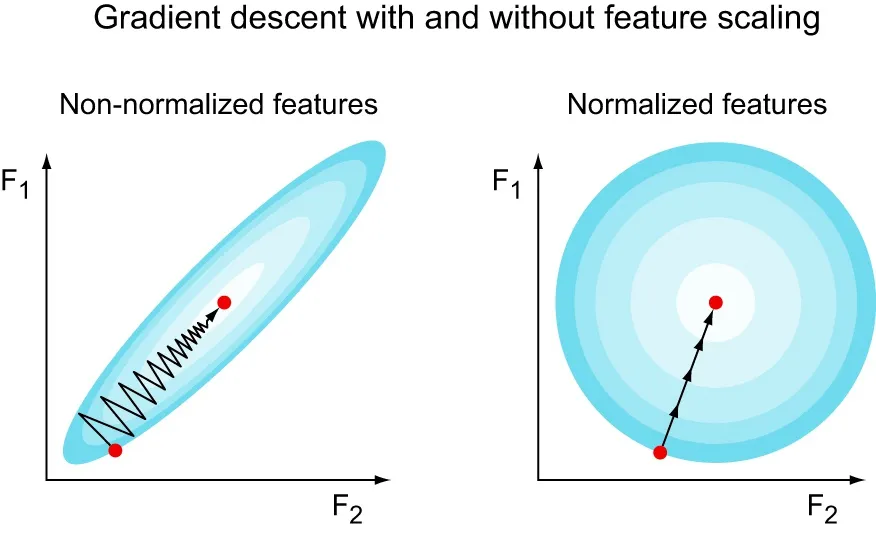

## Problems with R-squared, Adjusted R-squared


<img src='https://drive.google.com/uc?id=1b-FtN3tdQvtNdcaZc-9G8uYsApgXGVP7' width=800>


<img src='https://drive.google.com/uc?id=1dGp7eK8Kg58gD4ckuxaPT0GBMVSPFV3D' width=800>




<img src='https://drive.google.com/uc?id=1Od9Rs1xtoZIzz-EAD7MSRYOY9ysGPBcG' width=800>




<img src='https://drive.google.com/uc?id=1a2olIePIUOLiw9YMPqAR8xJ7w5Z0NOwj' width=800>


Let's implement it for our earlier model and test data.

In [ ]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.948634078843719


**Quiz** (Check your understanding)
```
How does the adjusted R2 score differ from the regular R2 score?

A) The adjusted R2 score accounts for the number of predictors in the model. [Correct Answer]
B) The adjusted R2 score is always higher than the regular R2 score.
C) The adjusted R2 score considers only the explanatory power of the model.
D) The adjusted R2 score is not influenced by the sample size.
```

**Quiz** (Check your understanding)

```
In adjusted R-squared, what is the range of possible values? (d < n)
A) 0 to 1
B) -inf to 1
C) 0 to infinity
D) -infinity to infinity

Correct Answer: B) -inf to 1
```

**Quiz** (Check your understanding)

```
What does a higher Adjusted R-squared value indicate about the regression model?
a) The model is a perfect fit to the data.
b) The model is overfitting the data.
c) The model explains more variance in the dependent variable.
d) The model has high bias.

Answer: c
```

## Intro to statsmodel

Let's check a library called `statsmodel` which we will be using throughout this lecture.


<img src='https://drive.google.com/uc?id=1UqMvediPF0U3eYIf0goSwDEvTpDT-OIx' width=800>



First we will download our data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [ ]:
y_train = np.array(y_train)

Now, let's train our model on the data.

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.512e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:32:39   Log-Likelihood:                 20675.
No. Observations:               13874   AIC:                        -4.132e+04
Df Residuals:                   13857   BIC:                        -4.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.62e+11   1.16e+11  

Let's look at few of the variables in this table:

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression.

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.

The prediction is same as scikit learn

In [ ]:
results.predict(X_sm)

,0
0,0.131974
1,0.999542
2,0.360795
3,0.256998
4,0.201045
...,...
13869,0.254468
13870,0.264794
13871,0.142389
13872,0.250806


**Quiz** (Check your understanding)

```
Why might the adjusted R2 score be considered more reliable than R2 when adding more predictors to a model?

a) Because it always increases with more predictors.
b) Because it penalizes the model for adding predictors that don't improve the model.
c) Because it is easier to calculate.
d) Because it always equals the R2 score.

Ans: B

```

**Quiz** (Check your understanding)
```

A regression model with 3 predictors has an R2 of 0.85. After adding a 4th predictor, the R2 increases to 0.86 but the adjusted R2 decreases. What can be inferred?

A. The 4th predictor improved the model significantly.
B. The adjusted R2 is incorrectly calculated.
C. The 4th predictor did not add meaningful information to the model.


Ans: C
```



<img src='https://drive.google.com/uc?id=11RpzJizarNFIVdajtEHNF1Rq5gzxavxj' width=800>



We will see more uses of statsmodel library as we continue with today's lecture.


## Assumptions of Linear Regression



<img src='https://drive.google.com/uc?id=11ec-xn-dBFrzNkvKgkGmS8cukMWx6GsF' width=800>


- We can arrive at concept of Linear regression in two ways.
  - Algebra & Optimization (Geometric) - We covered this
  - Probability & Statistics
- We can prove that Linear regression is a very good model if all the statistical assumptions holds true.


## 1.Assumption of Linearity




<img src='https://drive.google.com/uc?id=1R1hw0wgENxnMnhyYnHruXXuBF-P7Pb7D' width=800>


## 2. Non multi-collinear features



<img src='https://drive.google.com/uc?id=1qmdEkIKTrR6cJC_-FF3px-84W9jU0h_J' width=800>


<img src='https://drive.google.com/uc?id=1zQK-v_8Fx9ugBfU1GDoSfM-RihLVCqil' width=800>


**Quiz** (What do you think?)
```
Which of these isn't collinear?
A. f1=log(f2)
B. f1=(alpha^2+beta) f2
C. f1=5f2

Ans: A
```

**Quiz** (Check your understanding)

```
Q: How does multicollinearity affect regression analysis?
a) It reduces the interpretability of regression coefficients.
b) It increases the accuracy of the regression model.
c) It improves the goodness-of-fit of the regression model.
d) It has no impact on the regression analysis.

Ans: a) It reduces the interpretability of regression coefficients.
```

#### How can we remove these highly correlated features?

We will use something called VIF (Variance Inflation Factor)

Let's understand this with an example


<img src='https://drive.google.com/uc?id=1i2vEc1a0AFvO7pymRbb5szSYWqotp5ft' width=800>


<img src='https://drive.google.com/uc?id=1_troBdwiSSVlYquskAebrpmIOQy71c8p' width=800>

<img src='https://drive.google.com/uc?id=1cIM0nKynnJd2oCUXNV1EOqUMhdMKpncy' width=800>

<img src='https://drive.google.com/uc?id=1HE8FYMrDN0DLxHsH-spdQX3vaIbykGE9' width=800>


**Quiz** (What do you think?)

```
Q: What does a VIF value greater than 10 indicate?
a) A negligible impact of the predictor variable on the regression model.
b) A perfect linear relationship between the predictor variable and the dependent variable.
c) A significant influence of the predictor variable on the outcome variable.
d) Strong multicollinearity between the predictor variable and other variables.

Ans: d) Strong multicollinearity between the predictor variable and other variables.
```

**Quiz**

```
A clothing store wants to predict sales based on factors like price, promotions, and store location.
Which assumption of linear regression is important for accurate sales predictions?
A) Linearity between the independent variables and sales.
B) Normal distribution of sales.
C) MultiCollinearity among features
D) All of them
```

**Correct Answer:** A) Linearity between the independent variables and sales.


**Explanation:** The assumption of linearity assumes that there is a linear relationship between the independent variables (price, promotions, store location) and sales, thus ensuring that the model captures the true relationship and enables accurate sales predictions.

Now lets see if there are any multi-collinear features in Cars24 data

we will be using Statsmodel for Linear Regression

For standardization of X we will be using Scikit Learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Which does the implementation of Standardizing features for us

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:32:40   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5834      0.009    729.235      0.0

#### Multicollinearity and implementation
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.29
10,Diesel,17.29
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.16
4,max_power,5.02
6,make,3.33


#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

Removing the variable with highest VIF

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:32:42   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5834      0.009  

As we see, there's no drop in R-sq. and adj. R-sq. value even after removing the variable

Let's now keep on removing features till we
- either have a feature with vif<5

or
- have the model's adj. r2 score go below 0.85

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          6.14
Name: 2, dtype: object
Current adj.R2 0.8322522946246915
Features removed: 3
List of features removed: ['year', 'Petrol', '>5']


In [ ]:
print(vif)
print(sm_model.summary())

            Features   VIF
2              model  6.14
1             engine  6.12
3          max_power  4.85
4               make  3.29
5            mileage  2.86
6             Diesel  2.14
7                age  1.87
8             Manual  1.78
0                  5  1.70
9           Electric  1.22
10         km_driven  1.21
11        Individual  1.09
12  Trustmark Dealer  1.02
13               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6052.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:32:46   Log-Likelihood:                -33356.
No. Observations:               15856   AIC:                         6.674e+04
Df Residuals:                   15842   BI

## 3. Errors are normally distributed

<img src='https://drive.google.com/uc?id=1t_onTNlFNdKDy4B9GOGsZC2vSW8YrClD' width=800>

<img src='https://drive.google.com/uc?id=18QnAkJyEhcbIGtY9bruv-OfE6bTH6vgL' width=800>


<img src='https://drive.google.com/uc?id=1LStIkiL2y2Q8cvh0bolA9wjXypPgoq8w' width=800>


#### How do outliers impact linear regression?

Let's take a 2D e.g. of predicting the price from the given model.


<img src='https://drive.google.com/uc?id=10yTJ2YoJ5mMV41J_ThaZrP1xGCCa3dMI' width=800>



#### Question: After plotting the plot for errors, we see the curve is non-gaussian i.e. Outliers are present. How do we identify and remove these outlier?

Ans:

- Outliers will have large error value (yi - yi_hat).
- Remove the points will high error as many as you want and fit the model again.
- Check the distribtion of errors on new model and repeat.

Lets See how is the error distribution for Car24

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
y_train.shape

(15856,)

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

In [ ]:
Y_hat.shape

(15856,)

Text(0.5, 1.0, 'Histogram of residuals')

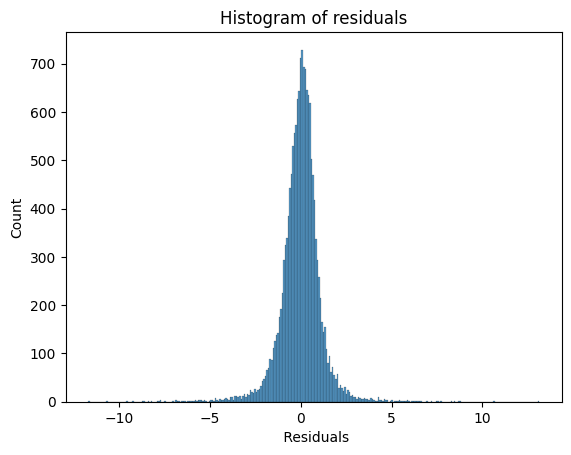

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
errors

,selling_price
3443,-0.193651
16090,0.124025
11070,0.404339
19214,-0.389842
17843,-0.006050
...,...
1099,-1.362943
18898,-0.487388
11798,0.450178
6637,-1.146986


This looks like a normal distribution, with a high mean and low S.D.

Let's do a normality test to check if the distribution is actually normal.

Recall:
- You must have studied Shapiro Wilk test in statistics module.

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


0.8901716755445364

Closer the value to 1, more is the normality.

In this case, a value of 0.85 denotes a high level of normality for the error distribuiton

- If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



**Quiz:**
```
While building a risk prediction model for loan defaulters, it was observed that the erros were right skewed.
Does this imply anyway that the linear regression model is inaccurate?


A) Yes, since the features are multi-collinear
B) Yes, since the errors aren’t normaly distributed
C) Yes, by violation of assumption of linearity
D) No, the model may be accurate.

```
**Correct Answer:** B) Yes, since the errors aren’t normaly distributed


# 4.Heteroskedasticity should not exist

<!-- <img src='https://drive.google.com/uc?id=1_K0iQfncOvnbO4S3kQjQsX2Rsr2907cr' width=800> -->

<img src='https://drive.google.com/uc?id=13fjHuhD7rfClnM8RX2ZagJQGpLL5mrun' width=800>


**Quiz** (Check your understanding)

```
Q: Which diagnostic plot can be used to detect heteroscedasticity?
a) Scatterplot of residuals against predicted values.
b) Histogram of residuals.
c) Normal probability plot of residuals.
d) Box plot of residuals.

Ans: a) Scatterplot of residuals against predicted values.
```

Lets implement heteroskedasticity in Cars24

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

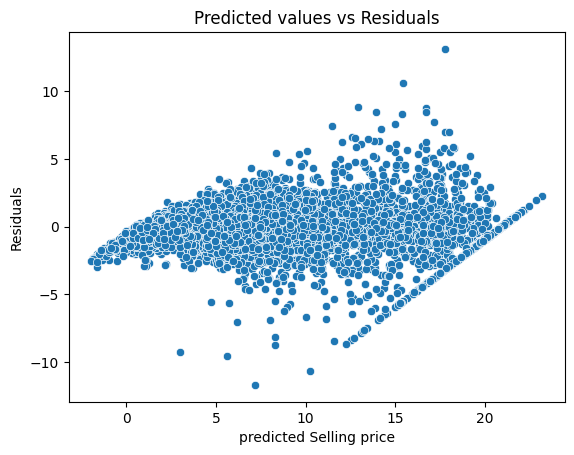

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right,the spread of  errors is almost constant

#### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions


### Using Goldfeld Quandt Test to check homoskedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 1.0176613865185002), ('p-value', 0.21807877686817925)]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.353 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.


**Note**:
In case we encounter heteroskedacity, we can use the following methods to remove the same:
- We can use transformations such as log, sq.rt., or boxcox transformation to remove heteroskedacity.
- Also, removing outliers will help.


# 5. No Autocorrelation

<img src='https://drive.google.com/uc?id=1ASQ8QsZdoekhH_Z7gtq20x9yeU-VrnMZ' width=800>



#### Summing up

- Summing up the Assumptions:
  - There exist a linear function
  - There is no auto correlation (related to time series)
  - Errors are normally distributed
  - No heteroskedasticity
  - No multicollinearity

We also have a fundamental assumption: $x^{(i)}, y^{(i)}$ are a random sample

**Quiz** (Revision)
```
In linear regression, a high VIF value suggests:
A) Heteroskedasticity is present
B) A strong linear relationship between the independent and dependent variables.
C) The absence of outliers in the dataset.
D) Strong multicollinearity between predictor variables.
```

**correct Answer**
D) Strong multicollinearity between predictor variables.